# IITM-IAARC Hackathon

This is my submission for the IITM-IAARC Joint Hackathon - Submission Round (via Unstop)

Submitted by- Lenin Kennedy
Date- 22/05/23


## Goal
Predict the compressive strength of concrete made using recycled aggregates.

## Some background
Concrete is a widely used construction material made by mixing cement, water, sand, and **Natural Aggregates (NA)** like gravel or crushed stone. **Recycled Concrete Aggregates (RCA)** , which are made from crushed concrete and other materials, can be used in place of traditional coarse aggregates in concrete production. The use of recycled aggregates in concrete can help reduce waste and lower the environmental impact of construction projects.

However, there are challenges in using recycled aggregates in concrete production. One major challenge is ensuring that the resulting concrete has sufficient compressive strength, which is a measure of its ability to withstand pressure. This is what I try to predict, the compressive strength of concrete made using recycled aggregates, based on various factors such as the cement-to-aggregate ratio, Water absorption of Natural Aggregates, etc.

## Data given

### Column descriptions

1-4 not sure

1. **Compressive strength tests**
1. **Elastic modulus tests**
1. **Flexural strength tests**
1. **Splitting tensile strength tests**
1. **Effective water-to-cement ratio** - ratio of the mass of water to the mass of cement added to concrete.
1. **Aggregate-to-cement ratio (a/c)** - The ratio of the mass of aggregate to the mass of cement in concrete.
1. **RCA replacement ratio (RCA %)** - The percentage of coarse aggregate in concrete that is replaced with recycled concrete aggregate (RCA).
1. **Parent concrete strength(MPa)** - The compressive strength of the original concrete used to produce the recycled concrete aggregate (RCA).
1. **Nominal maximum RCA size(mm)** - The maximum size of recycled concrete aggregate (RCA) used in the concrete mix, as specified by the manufacturer or designer.
1. **Nominal maximum NA size(mm)** - The maximum size of natural aggregates (NA) used in the concrete mix, as specified by the manufacturer or designer.
1. **Bulk density of RCA (kg/m3)** - The mass of recycled concrete aggregate (RCA) per unit volume, including voids.
1. **Bulk density of NA (kg/m3)** - The mass of natural aggregates (NA) per unit volume, including voids.
1. **Water absorption of RCA(WARCA) (%)** - The percentage of water absorbed by recycled concrete aggregate (RCA) after immersion in water for a specified period of time.
1. **Water absorption of NA** - The water absorption of natural aggregates (NA), expressed as a percentage.
1. **Los Angeles abrasion of RCA** - A measure of the resistance of recycled concrete aggregate (RCA) to abrasion, determined by subjecting a sample to repeated impact and grinding actions.
1. **Los Angeles abrasion of NA** -  A measure of the resistance of natural aggregates (NA) to abrasion, determined by subjecting a sample to repeated impact and grinding actions.
1. **Density of hardened concrete AD (qad) (kg/m3)** -  The mass of hardened concrete per unit volume, including voids, when it is in a dry state.
1. **Density of hardened concrete SSD (qSSD) (kg/m3)** - The mass of hardened concrete per unit volume, including voids, when it is saturated with water and all excess water has been removed from the surface.
1. **Compressive strength (f’c) (MPa)** - The compressive strength of the hardened concrete, measured in megapascals (MPa).

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/64419cffd5f58_ISARC_Hackathon_Dataset.xlsx')

In [ ]:
df.head()

,Compressive\nstrength tests,Elastic\nmodulus tests,Flexural\nstrength tests,Splitting\ntensile strength tests,Effective\nwater- to-cement ratio,Aggregate-\nto-cement ratio (a/c),RCA\nreplacement ratio (RCA %),Parent\nconcrete strength(MPa),Nominal\nmaximum RCA size(mm),Nominal\nmaximum NA size(mm),Bulk\ndensity of RCA (kg/m3),Bulk\ndensity of NA (kg/m3),Water\nabsorption of RCA(WARCA) (%),Water\nabsorption of NA,Los\nAngeles abrasion of RCA,Los\nAngeles abrasion of NA,Density of\nhardened\nconcrete\nAD (qad)\n(kg/m3),Density of\nhardened\nconcrete\nSSD (qSSD)\n(kg/m3),Compressive\nstrength (f’c) (MPa)
0,C1,C1,NaN,C1,0.45,2.50,100.0,NaN,20.0,20.0,2580.0,NaN,3.5,NaN,NaN,NaN,NaN,NaN,52.1
1,S1,NaN,NaN,NaN,0.47,3.80,0.0,NaN,20.0,25.0,NaN,2610.0,NaN,1.0,NaN,NaN,NaN,NaN,53.1
2,S1,NaN,NaN,NaN,0.55,4.03,0.0,NaN,NaN,NaN,2214.0,2687.0,2.7,1.2,NaN,NaN,NaN,NaN,25.0
3,S1,NaN,NaN,NaN,0.47,3.50,100.0,NaN,20.0,25.0,2273.0,NaN,3.6,NaN,NaN,NaN,NaN,NaN,41.6
4,S1,C2,NaN,NaN,0.48,2.80,100.0,NaN,19.0,25.0,2390.0,NaN,4.4,NaN,NaN,NaN,NaN,NaN,27.2


In [ ]:
# removing the \n from the column names
orginal_cols = list(df)
fixed_cols = [i.replace('\n',' ') for i in orginal_cols]
cols = {i:j for i,j in zip(orginal_cols,fixed_cols)}
df.rename(columns = cols, inplace = True)

In [ ]:
# since no context is given for the columns 1 to 4, we can drop them
df = df.iloc[:, 4:]

In [ ]:
df.describe()

,Effective water- to-cement ratio,Aggregate- to-cement ratio (a/c),RCA replacement ratio (RCA %),Parent concrete strength(MPa),Nominal maximum RCA size(mm),Nominal maximum NA size(mm),Bulk density of RCA (kg/m3),Bulk density of NA (kg/m3),Water absorption of RCA(WARCA) (%),Water absorption of NA,Los Angeles abrasion of RCA,Los Angeles abrasion of NA,Density of hardened concrete AD (qad) (kg/m3),Density of hardened concrete SSD (qSSD) (kg/m3),Compressive strength (f’c) (MPa)
count,522.000000,485.000000,522.000000,56.000000,468.000000,468.000000,373.000000,332.000000,361.000000,323.000000,96.000000,87.000000,93.000000,71.000000,522.000000
mean,0.479023,3.080082,51.812261,46.176786,21.420940,21.955128,2414.579088,2660.816265,5.222050,1.138731,35.594792,26.013793,2336.827957,2356.619718,42.765115
std,0.107977,0.889291,40.068741,17.161113,5.549481,5.333836,130.705806,97.409247,1.803867,0.690436,7.466633,4.013500,103.017477,93.760541,14.613932
min,0.190000,1.500000,0.000000,26.300000,7.000000,7.000000,2010.000000,2381.000000,1.600000,0.200000,15.100000,11.900000,1989.000000,2038.000000,12.400000
25%,0.410000,2.500000,15.250000,37.300000,19.000000,20.000000,2330.000000,2600.000000,4.000000,0.600000,30.100000,23.000000,2294.000000,2310.000000,33.125000
50%,0.470000,2.900000,50.000000,40.700000,20.000000,20.000000,2420.000000,2665.000000,5.100000,1.100000,35.800000,24.800000,2366.000000,2350.000000,41.800000
75%,0.540000,3.400000,100.000000,44.675000,25.000000,25.000000,2480.000000,2720.000000,6.100000,1.400000,40.050000,29.700000,2390.000000,2400.000000,50.450000
max,0.870000,6.950000,100.000000,100.000000,32.000000,38.000000,2880.000000,2970.000000,10.900000,3.150000,59.800000,32.000000,2550.000000,2610.000000,108.500000


Let us examine features in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Effective water- to-cement ratio                 522 non-null    float64
 1   Aggregate- to-cement ratio (a/c)                 485 non-null    float64
 2   RCA replacement ratio (RCA %)                    522 non-null    float64
 3   Parent concrete strength(MPa)                    56 non-null     float64
 4   Nominal maximum RCA size(mm)                     468 non-null    float64
 5   Nominal maximum NA size(mm)                      468 non-null    float64
 6   Bulk density of RCA (kg/m3)                      373 non-null    float64
 7   Bulk density of NA (kg/m3)                       332 non-null    float64
 8   Water absorption of RCA(WARCA) (%)               361 non-null    float64
 9   Water absorption of NA          

In [ ]:
# dropping rows that have Compressive strength (f’c) (MPa) as null
df.dropna(subset=["Compressive strength (f’c) (MPa)"], inplace=True)

In [ ]:
df.shape

(522, 15)

## Investigating the data

### Visualising missing values for a sample of 250

<Axes: >

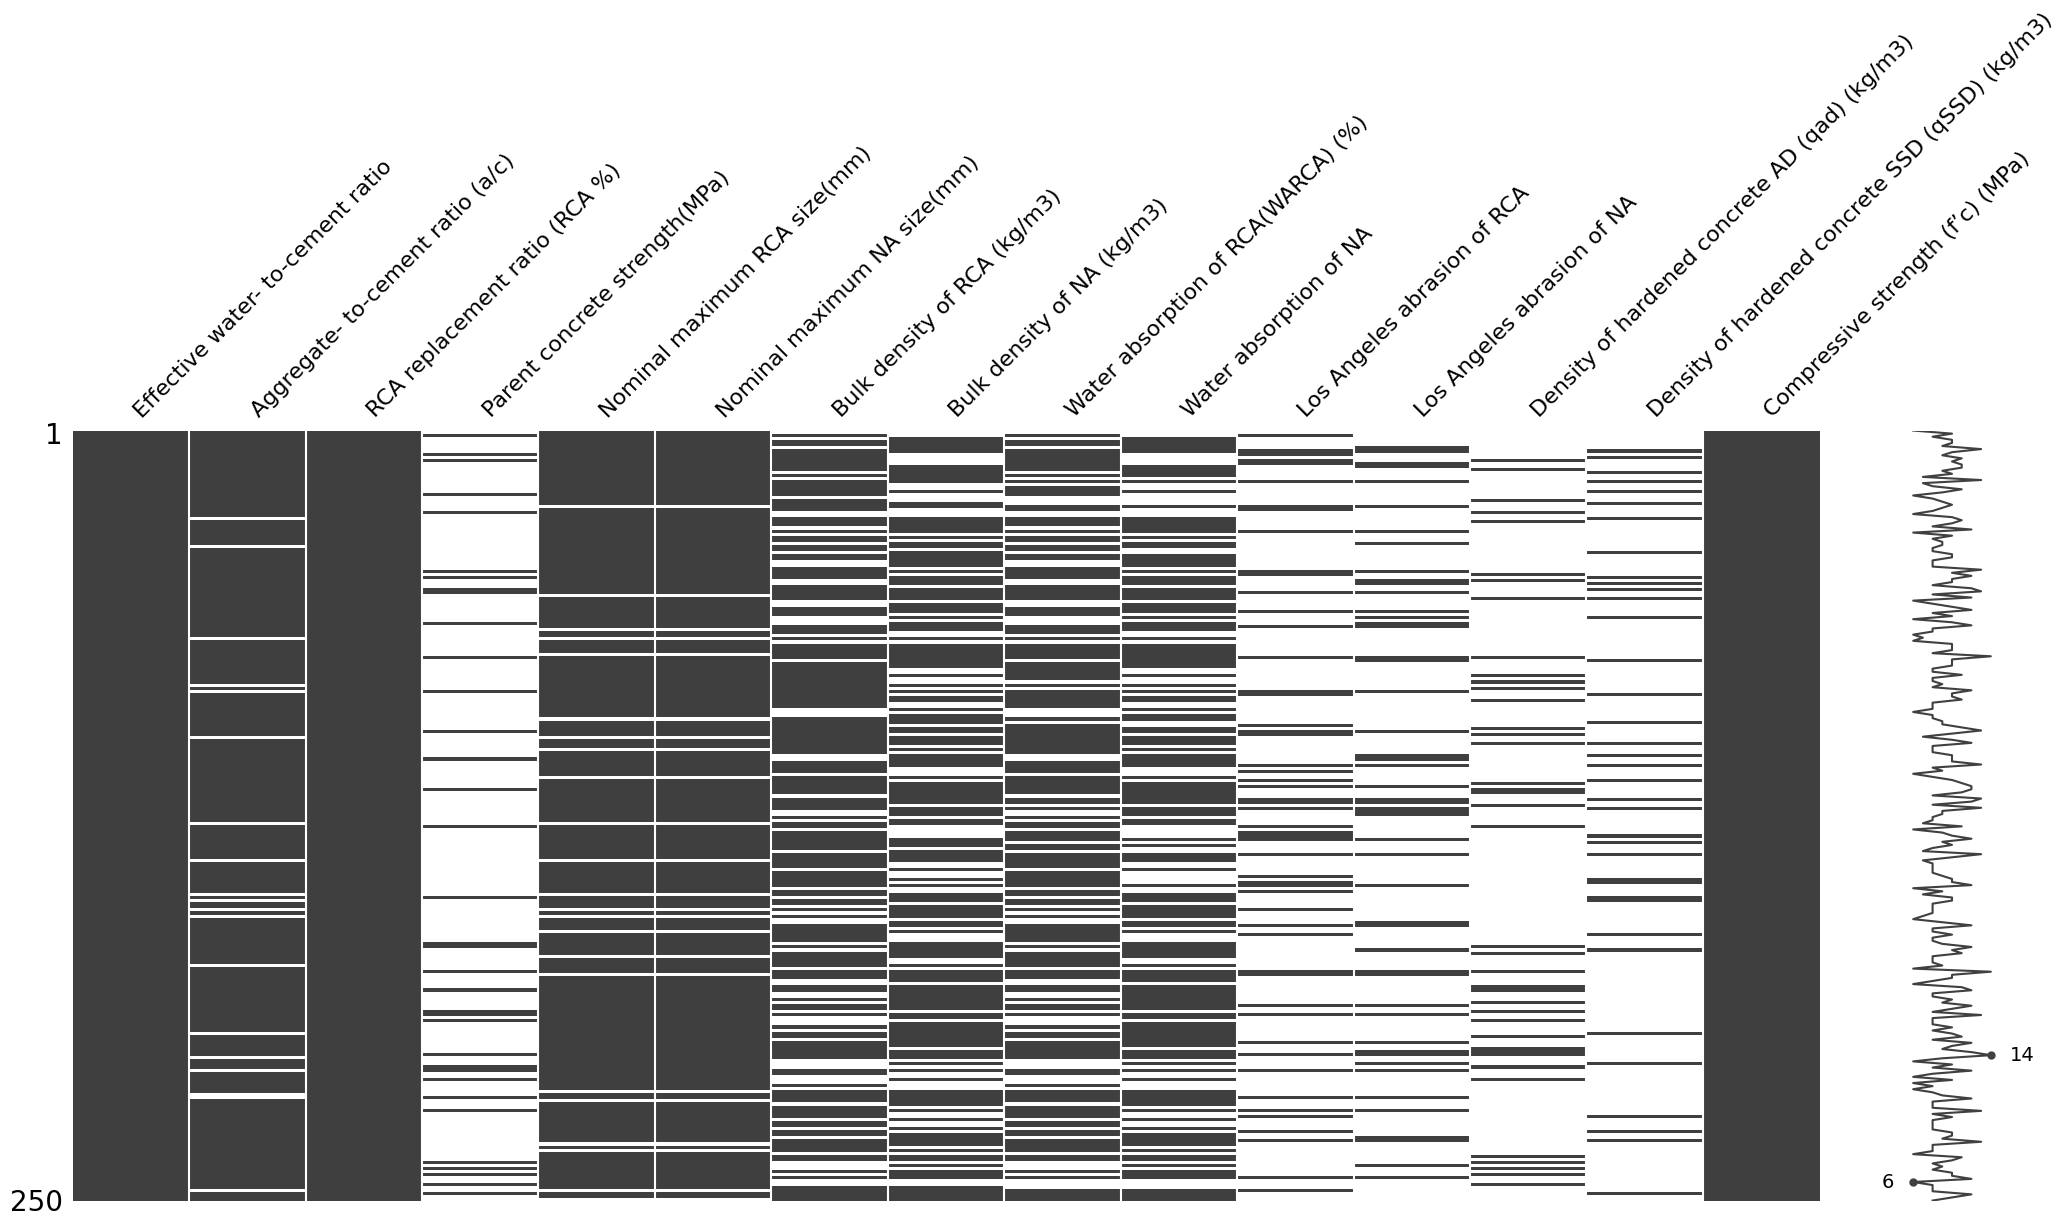

In [ ]:
msno.matrix(df.sample(250))

In [ ]:
print("total number of rows in the our dataset\t\t   522\n")
df.isnull().sum() #checking for total null values

total number of rows in the our dataset		   522



Effective water- to-cement ratio                     0
Aggregate- to-cement ratio (a/c)                    37
RCA replacement ratio (RCA %)                        0
Parent concrete strength(MPa)                      466
Nominal maximum RCA size(mm)                        54
Nominal maximum NA size(mm)                         54
Bulk density of RCA (kg/m3)                        149
Bulk density of NA (kg/m3)                         190
Water absorption of RCA(WARCA) (%)                 161
Water absorption of NA                             199
Los Angeles abrasion of RCA                        426
Los Angeles abrasion of NA                         435
Density of hardened concrete AD (qad) (kg/m3)      429
Density of hardened concrete SSD (qSSD) (kg/m3)    451
Compressive strength (f’c) (MPa)                     0
dtype: int64

### Heatmap
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

<Axes: >

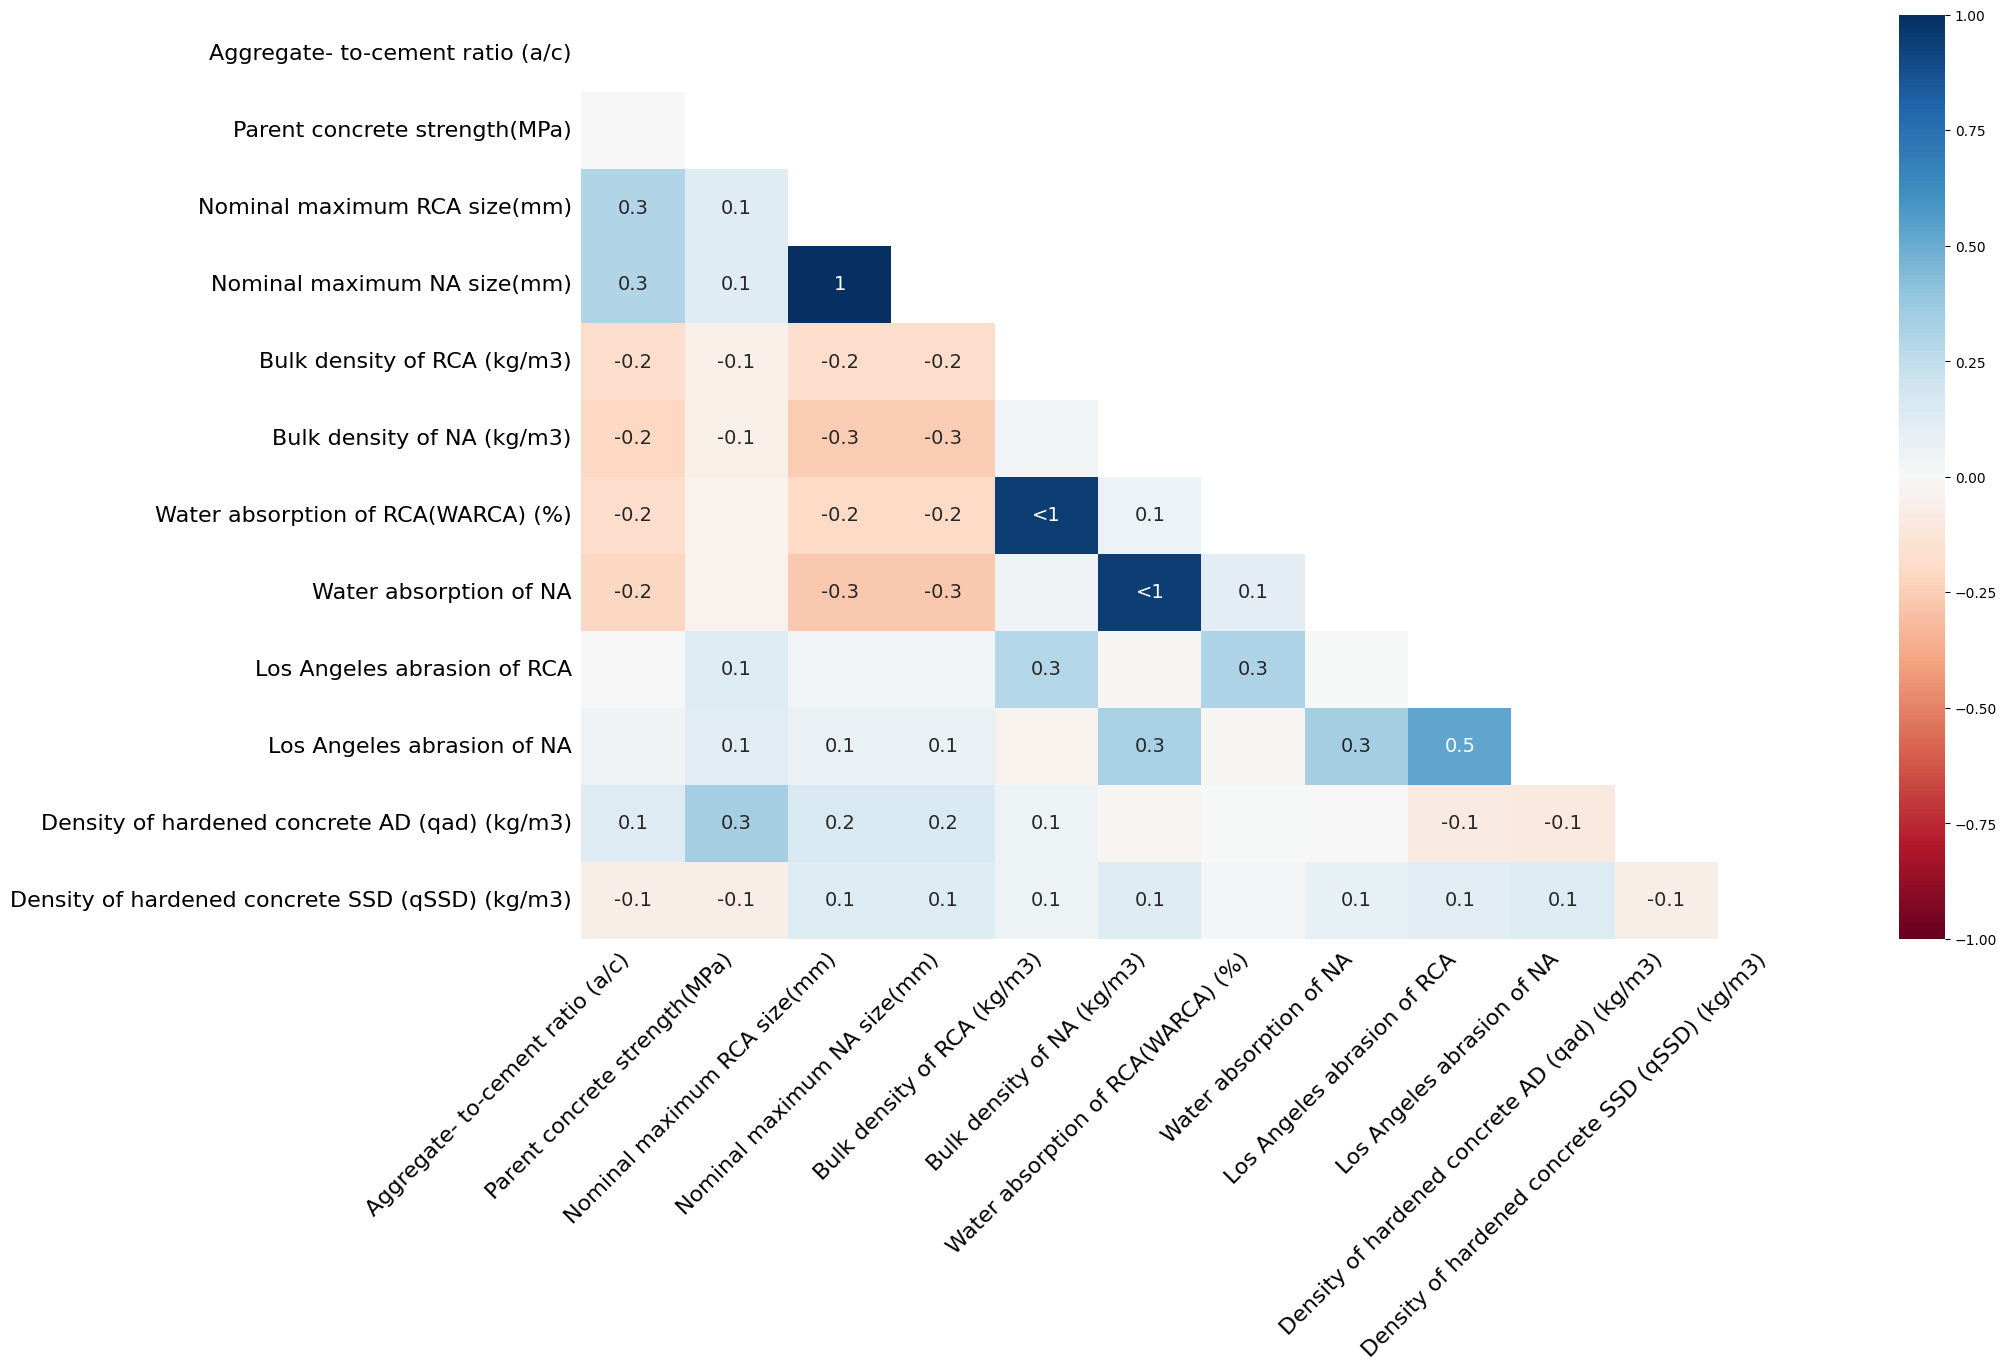

In [ ]:
msno.heatmap(df)

### Correlation matrix

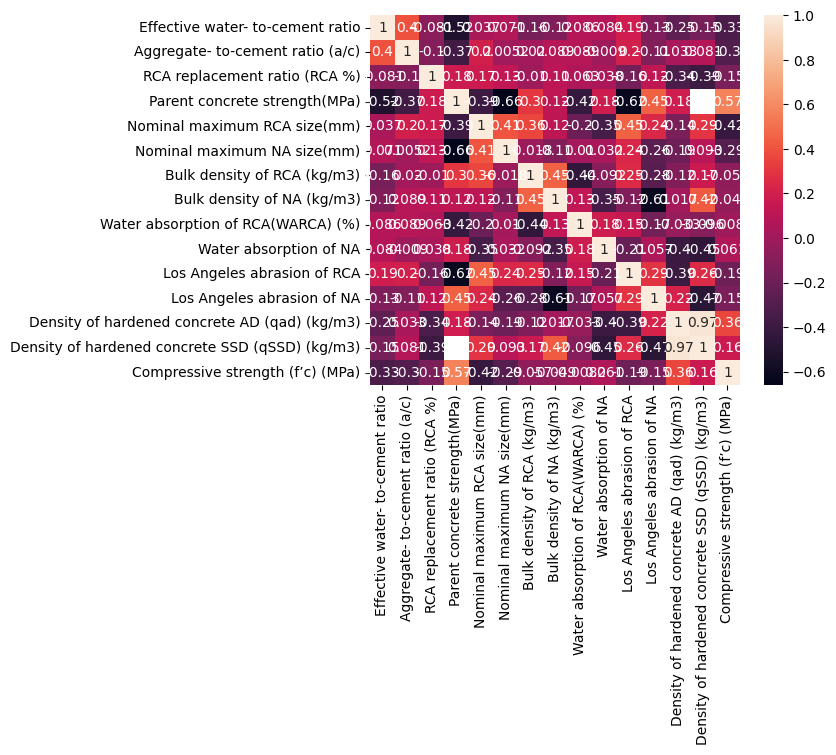

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True, square=True);

From the above, we can infer that *Effective water- to-cement ratio, Aggregate- to-cement ratio (a/c), RCA replacement ratio (RCA %), Nominal maximum RCA size(mm), Nominal maximum NA size(mm)* are **negatively corelated** with *Compressive strength*



### Relationship between Compressive strength and variables

<Axes: xlabel='Effective water- to-cement ratio', ylabel='Compressive strength (f’c) (MPa)'>

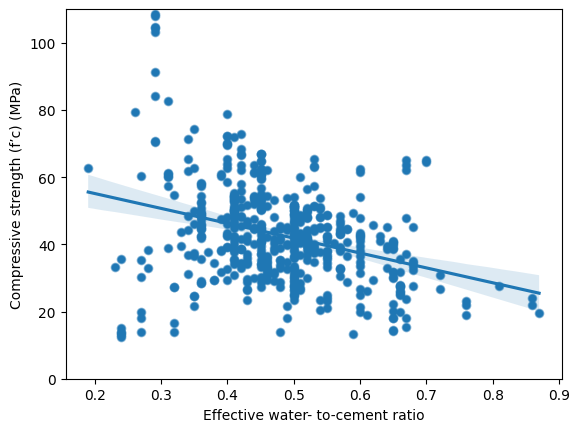

In [ ]:
#scatter plot Effective water- to-cement ratio/Compressive strength (f’c) (MPa)
var = 'Effective water- to-cement ratio'
data = pd.concat([df['Compressive strength (f’c) (MPa)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Compressive strength (f’c) (MPa)', ylim=(0,110));

sns.regplot(x=var, y='Compressive strength (f’c) (MPa)', data=data, scatter_kws={'alpha':0.5})

<Axes: xlabel='Aggregate- to-cement ratio (a/c)', ylabel='Compressive strength (f’c) (MPa)'>

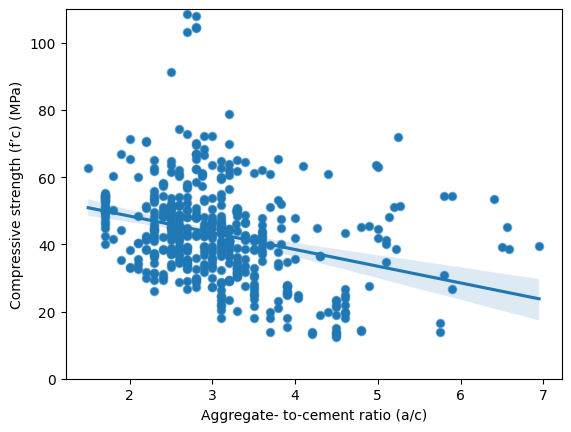

In [ ]:
#scatter plot Aggregate- to-cement ratio (a/c)/Compressive strength (f’c) (MPa)
var = 'Aggregate- to-cement ratio (a/c)'
data = pd.concat([df['Compressive strength (f’c) (MPa)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Compressive strength (f’c) (MPa)', ylim=(0,110));

sns.regplot(x=var, y='Compressive strength (f’c) (MPa)', data=data, scatter_kws={'alpha':0.5})

<Axes: >

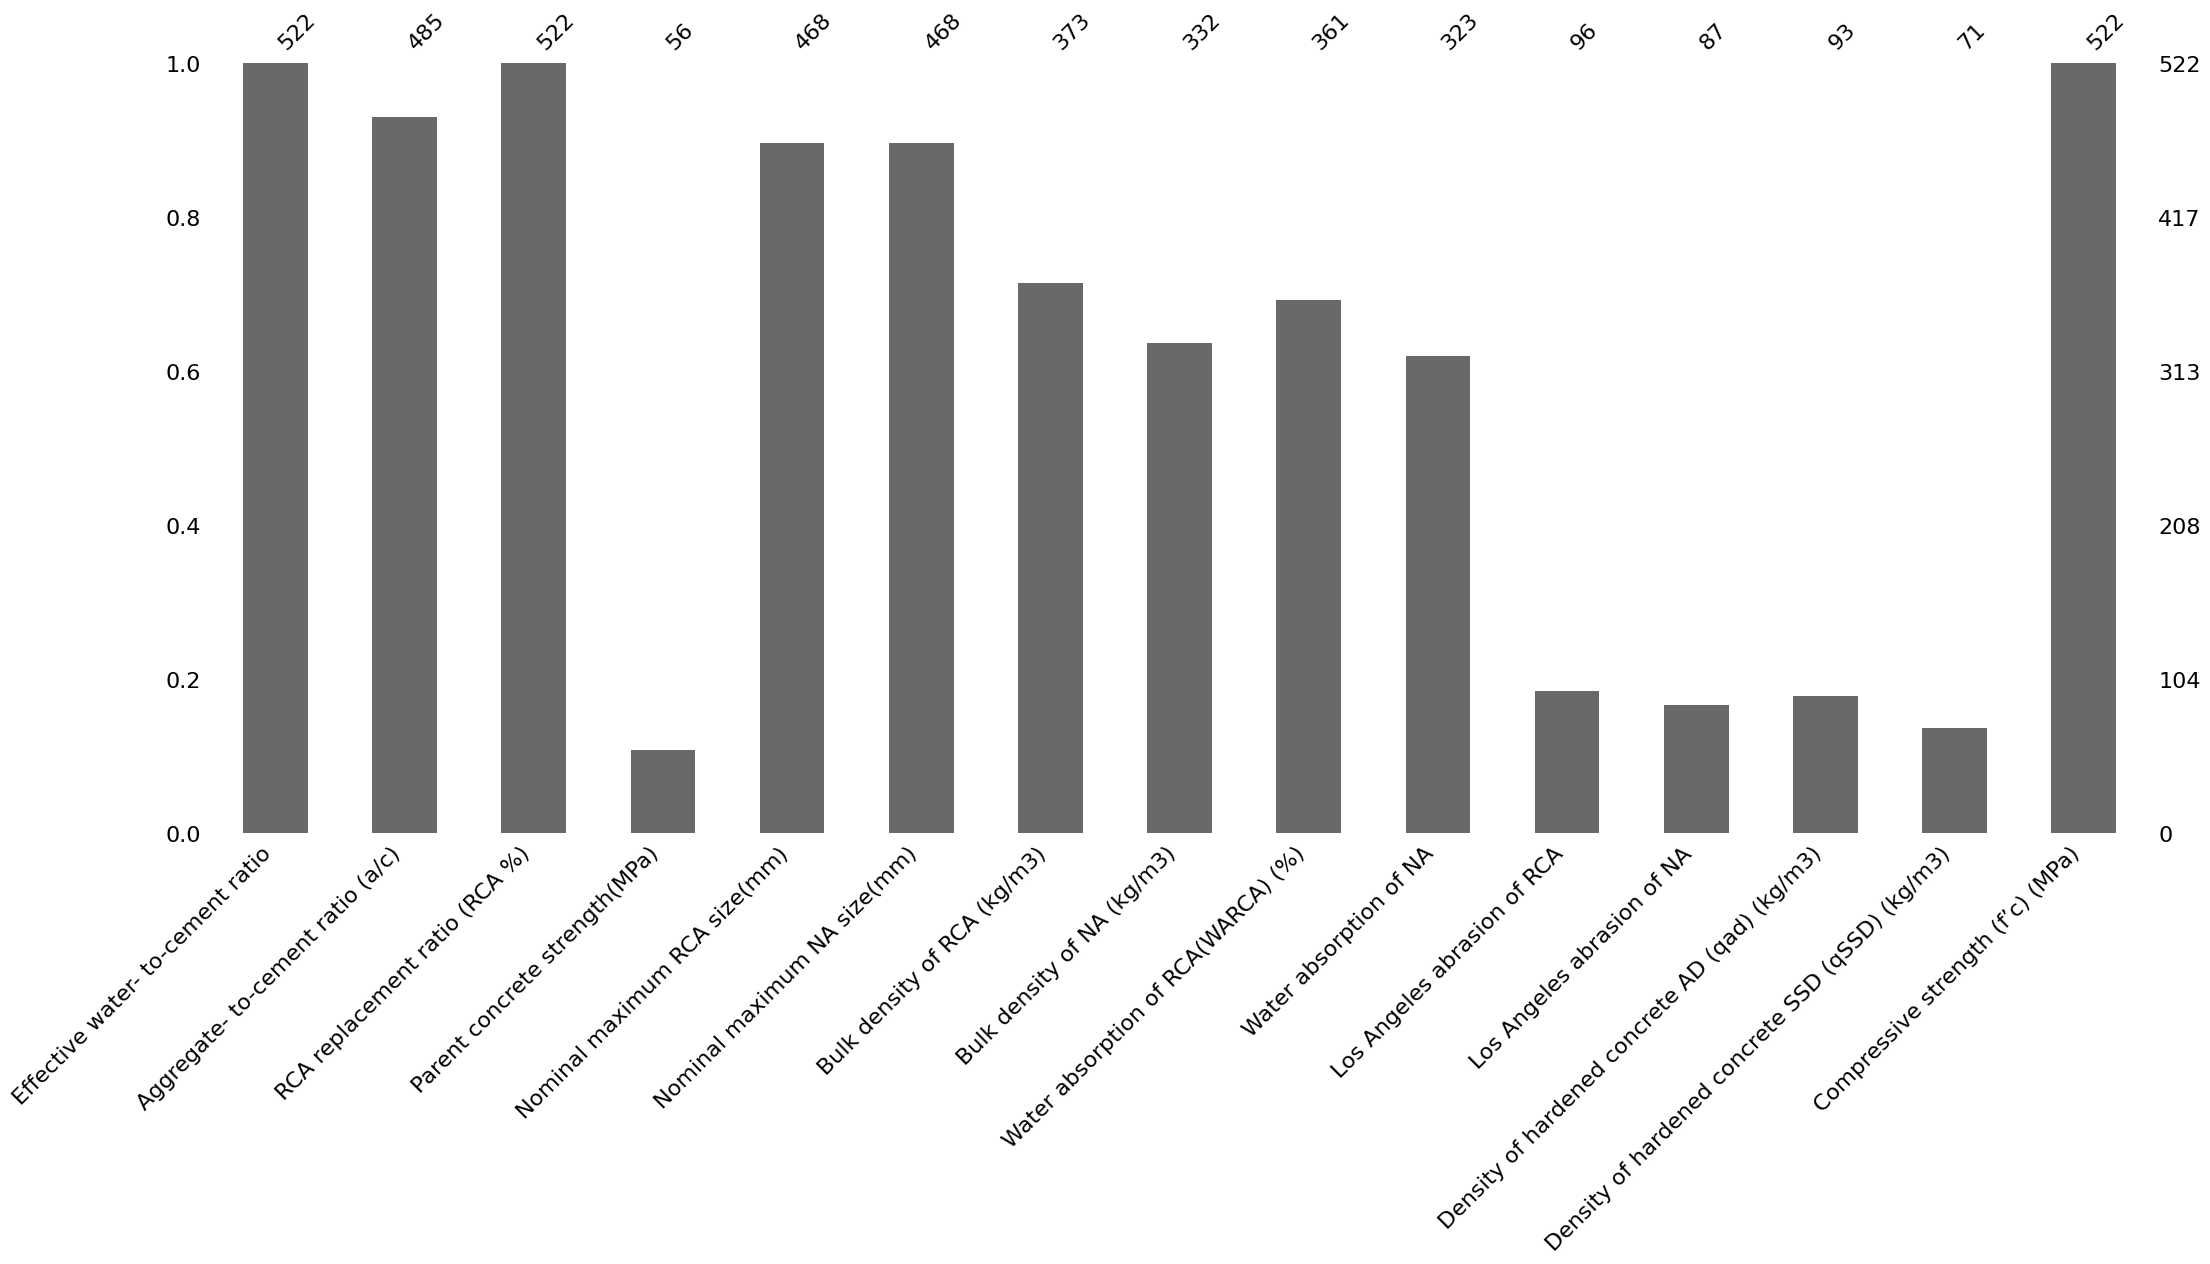

In [ ]:
msno.bar(df)

### Dendrogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<Axes: >

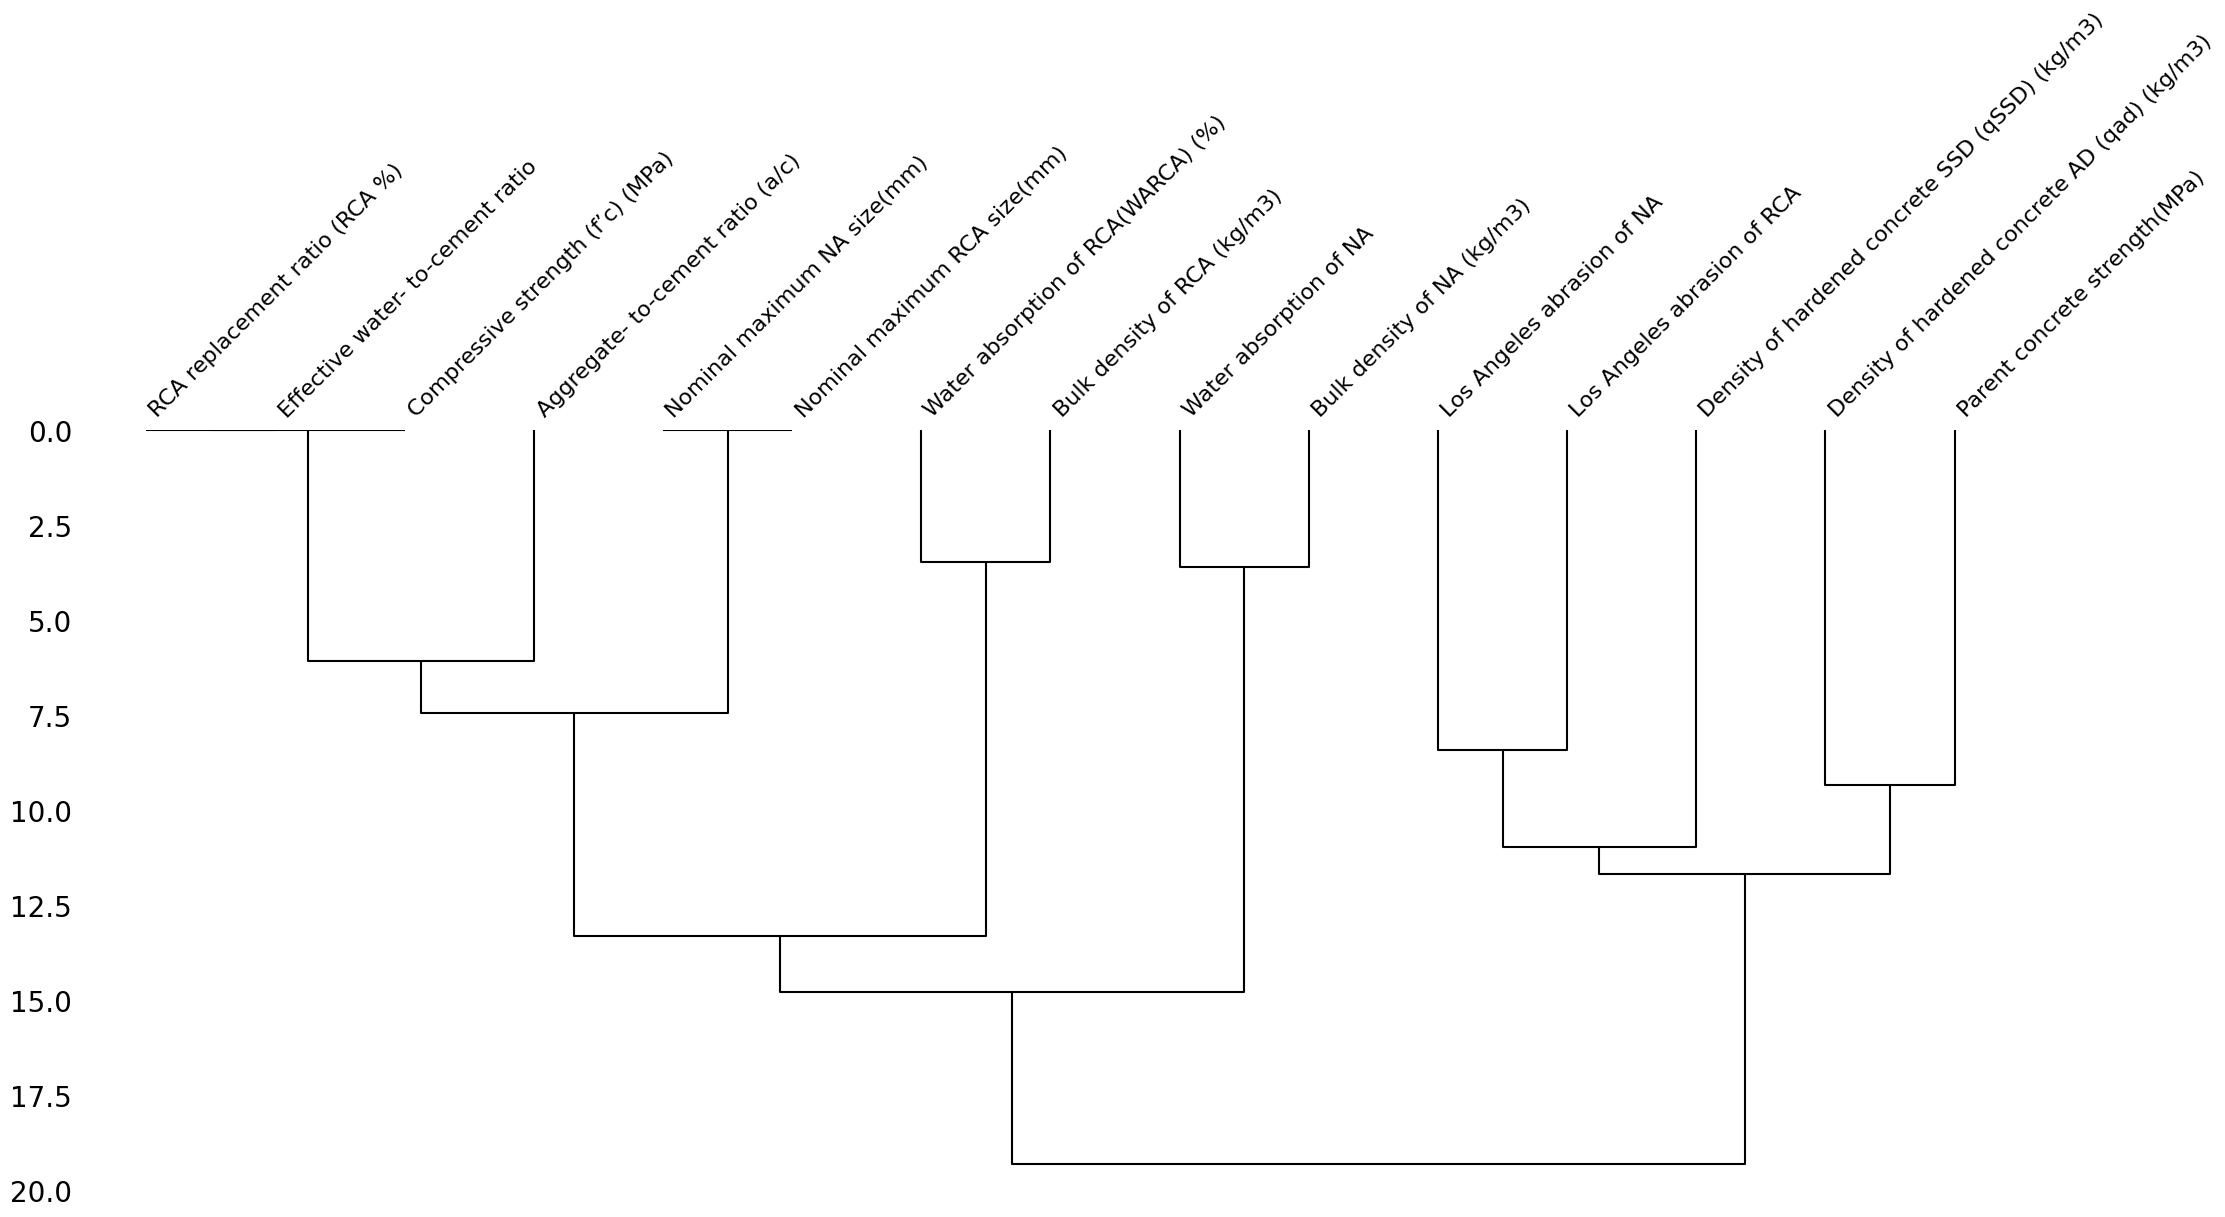

In [ ]:
msno.dendrogram(df)

### Inferring from the above graphs

Going right to left in the dendrogram, we have the folowing inferences

#### 1)
The right most part of the Dendrogram tells us that the distribution of

*Los Angeles abrasion of RCA, Los Angeles abrasion of NA, Density of hardened concrete AD, Density of hardened concrete SSD and Parent concrete strength*

is much similar to each other than te other features in the dataset.

One of the reasons for this clustering could be the large number of null data points in these features.

Checking with the corelation heatmap, they are weakly corelated.

So we can assume that these features can be **safely dropped from our analysis**.

#### 2)

Another thing we can infer is that *Bulk density of RCA and Water absorption of RCA(WARCA)* are **strongly corelated and share exact distribition** as seen from the corelation heatmap and dendrogram.  

The same goes for *Bulk density of NA and Water absorption of NA*.

And both of these clusters join at the exact same level. This means **both of the clusters are equally important**



## Handling missing values

We identified from the above graphs that these features can be safely dropped.

- Los Angeles abrasion of RCA
- Los Angeles abrasion of NA
- Density of hardened concrete AD (qad) (kg/m3)
- Density of hardened concrete SSD (qSSD) (kg/m3)
- Parent concrete strength

In [ ]:
cols=["Los Angeles abrasion of RCA", "Los Angeles abrasion of NA",
      "Density of hardened concrete AD (qad) (kg/m3)",
      "Density of hardened concrete SSD (qSSD) (kg/m3)",
      "Parent concrete strength(MPa)"]
df=df.drop(cols, axis=1)

<Axes: >

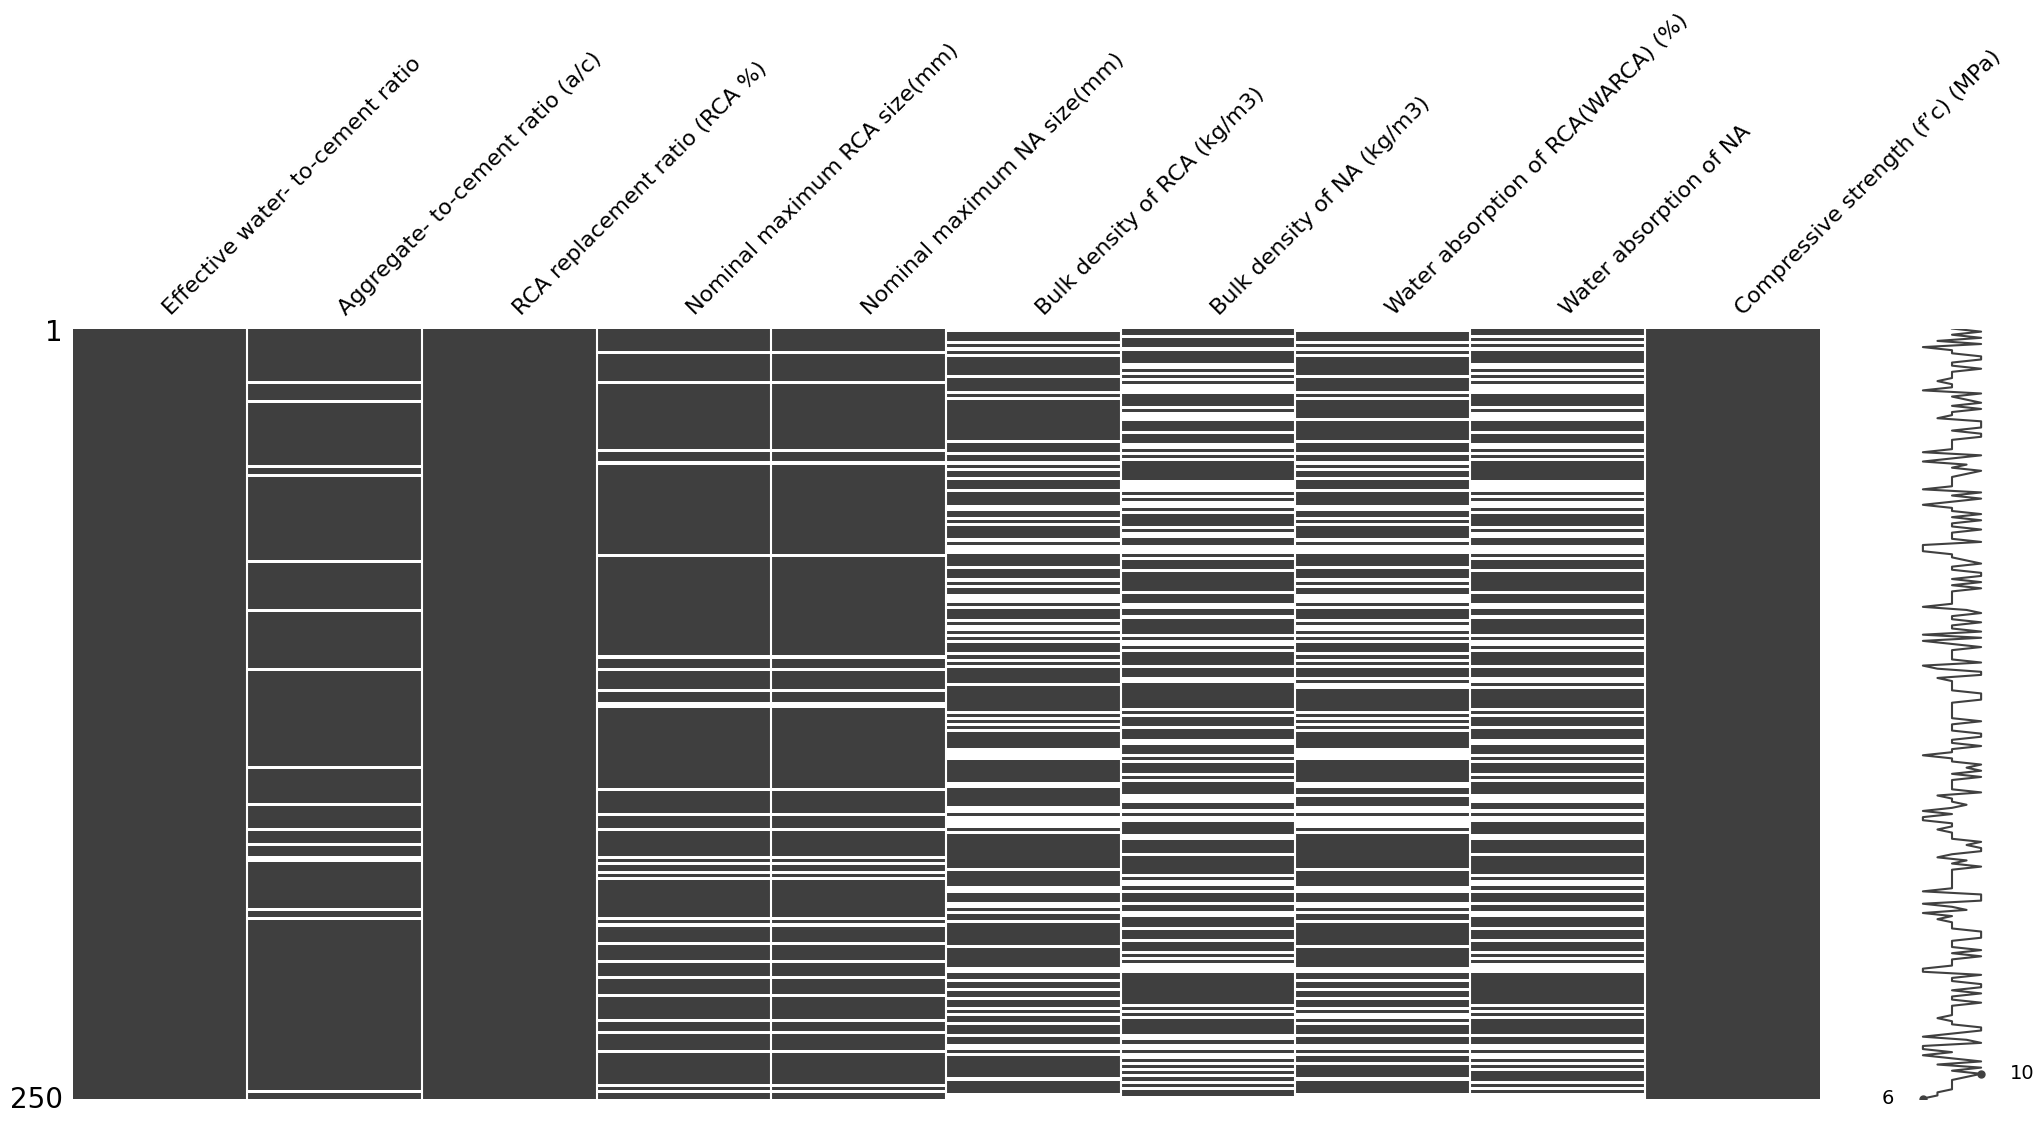

In [ ]:
msno.matrix(df.sample(250))

In [ ]:
df.shape

(522, 10)

In [ ]:
print("total number of rows in the our dataset  ",df.shape[0],"\n")
df.isnull().sum() #checking for total null values

total number of rows in the our dataset   522 



Effective water- to-cement ratio        0
Aggregate- to-cement ratio (a/c)       37
RCA replacement ratio (RCA %)           0
Nominal maximum RCA size(mm)           54
Nominal maximum NA size(mm)            54
Bulk density of RCA (kg/m3)           149
Bulk density of NA (kg/m3)            190
Water absorption of RCA(WARCA) (%)    161
Water absorption of NA                199
Compressive strength (f’c) (MPa)        0
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Water absorption of NA,199,0.381226
Bulk density of NA (kg/m3),190,0.363985
Water absorption of RCA(WARCA) (%),161,0.308429
Bulk density of RCA (kg/m3),149,0.285441
Nominal maximum RCA size(mm),54,0.103448
Nominal maximum NA size(mm),54,0.103448
Aggregate- to-cement ratio (a/c),37,0.070881
Effective water- to-cement ratio,0,0.000000
RCA replacement ratio (RCA %),0,0.000000
Compressive strength (f’c) (MPa),0,0.000000


In [ ]:
# export the cleaned data
df.to_csv('cleaned_data1.csv', index=False)

- Water absorption of NA
- Bulk density of NA (kg/m3)            
- Water absorption of RCA(WARCA) (%)
- Bulk density of RCA (kg/m3)           

These features have more than 15% missing data and are also very weakly correlated with *Compressive strength*

Hence, they are to be dropped too

In [ ]:
cols=["Water absorption of NA", "Bulk density of NA (kg/m3)",
      "Water absorption of RCA(WARCA) (%)"]

df_missing=df.drop(cols, axis=1)

cols=cols+["Bulk density of RCA (kg/m3)"]
df=df.drop(cols, axis=1)

The rest can be fixed by dropping the rows which has null values

In [ ]:
df = df.dropna()

#### Note
**75 rows were dropped in df due to null values in Nominal maximum RCA size(mm)**

We have to instead fill those null values for a better model, using data interpolation techniques

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 547
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Effective water- to-cement ratio  447 non-null    float64
 1   Aggregate- to-cement ratio (a/c)  447 non-null    float64
 2   RCA replacement ratio (RCA %)     447 non-null    float64
 3   Nominal maximum RCA size(mm)      447 non-null    float64
 4   Nominal maximum NA size(mm)       447 non-null    float64
 5   Compressive strength (f’c) (MPa)  447 non-null    float64
dtypes: float64(6)
memory usage: 24.4 KB


In [ ]:
# df_missing has missing data which we will impute using XGBoost
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 0 to 547
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Effective water- to-cement ratio  522 non-null    float64
 1   Aggregate- to-cement ratio (a/c)  485 non-null    float64
 2   RCA replacement ratio (RCA %)     522 non-null    float64
 3   Nominal maximum RCA size(mm)      468 non-null    float64
 4   Nominal maximum NA size(mm)       468 non-null    float64
 5   Bulk density of RCA (kg/m3)       373 non-null    float64
 6   Compressive strength (f’c) (MPa)  522 non-null    float64
dtypes: float64(7)
memory usage: 32.6 KB


In [ ]:
# export the cleaned data
df.to_csv('cleaned_data.csv', index=False)
df_missing.to_csv('cleaned_missing_data.csv', index=False)

### Scatter plots between Compressive strength and correlated variables

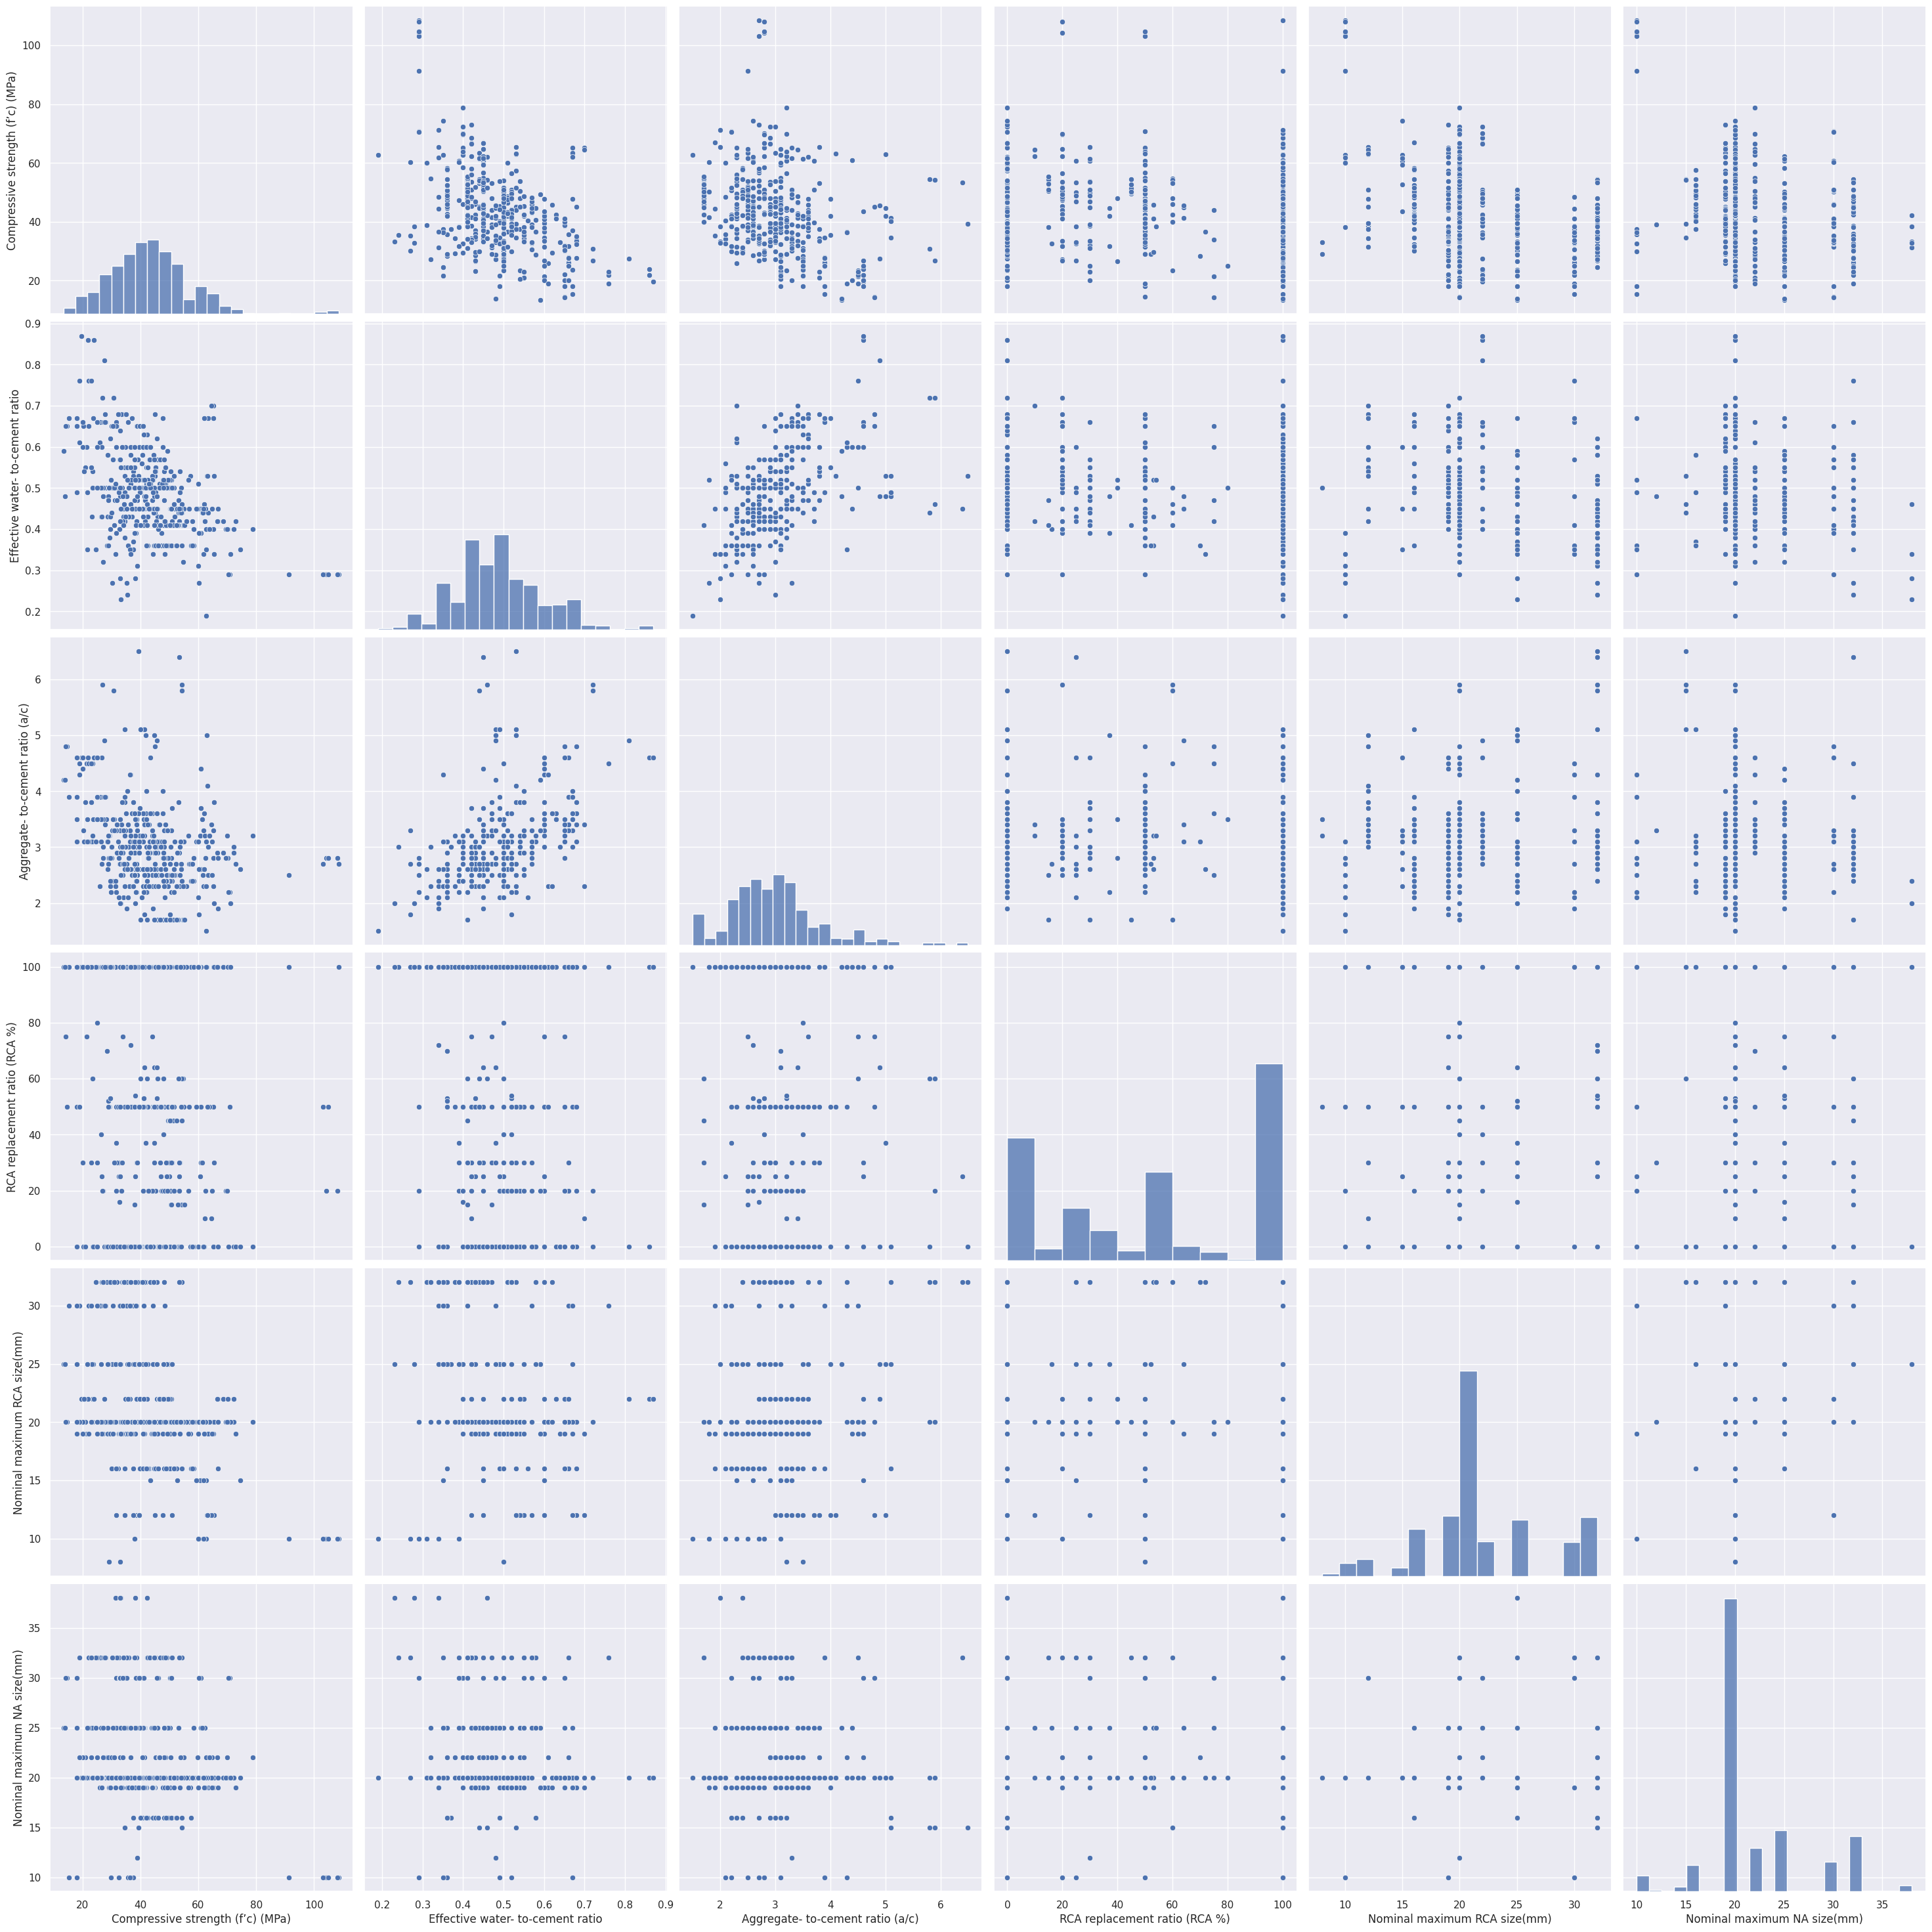

In [ ]:
sns.set()
cols = ['Compressive strength (f’c) (MPa)', 'Effective water- to-cement ratio',
        'Aggregate- to-cement ratio (a/c)',
        'RCA replacement ratio (RCA %)', 'Nominal maximum RCA size(mm)',
        'Nominal maximum NA size(mm)']
sns.pairplot(df[cols], size = 5)
plt.show();

Nothing valuable is there to infer from the above

In [ ]:
print("total number of rows in the our dataset-  ",df.shape[0],"\n")
print()
print("null values?")
df.isnull().sum() #checking for total null values

total number of rows in the our dataset-   447 


null values?


Effective water- to-cement ratio    0
Aggregate- to-cement ratio (a/c)    0
RCA replacement ratio (RCA %)       0
Nominal maximum RCA size(mm)        0
Nominal maximum NA size(mm)         0
Compressive strength (f’c) (MPa)    0
dtype: int64

## Learning models

### Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Compressive strength (f’c) (MPa)', axis=1), df['Compressive strength (f’c) (MPa)'], test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Test the accuracy of the model using R-squared score
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)


Accuracy: 0.3197653976904059
Root Mean Squared Error (RMSE): 9.620658682839661


### Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.model_selection import train_test_split

# define X and y
X = df.drop('Compressive strength (f’c) (MPa)', axis=1)
y = df['Compressive strength (f’c) (MPa)']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Test the accuracy of the model using R-squared score
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Accuracy: 0.3197653976904059
Root Mean Squared Error (RMSE): 9.620658682839661


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import math

# Split data into train and test sets
X = df.drop('Compressive strength (f’c) (MPa)', axis=1)
y = df['Compressive strength (f’c) (MPa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model and fit to training data
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Test the accuracy of the model using R-squared score
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)


Accuracy: 0.6321956521132632
Root Mean Squared Error (RMSE): 7.074306575297391


### XGBoost

In [ ]:
# Import the XGBoost library
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import math

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=100)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the R-squared score to evaluate accuracy
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Accuracy: 0.6715029201670211
Root Mean Squared Error (RMSE): 6.685612542122529


#### Data Imputation with XGboost

XGboost handles missing data out of the box. so let's use that.

In [ ]:
# Import the XGBoost library
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import math

X = df_missing.drop('Compressive strength (f’c) (MPa)', axis=1)
y = df_missing['Compressive strength (f’c) (MPa)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

# Create an XGBoost regression model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate=0.1, max_depth=5, n_estimators=100)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the R-squared score to evaluate accuracy
accuracy = r2_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Accuracy: 0.864691398986597
Root Mean Squared Error (RMSE): 5.655897729185629


Text(0.5, 0, 'Feature Importance')

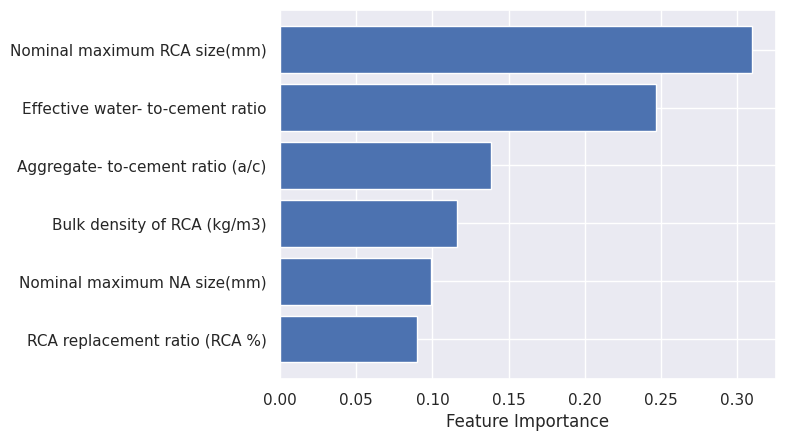

In [ ]:
sort = xgb_model.feature_importances_.argsort()
plt.barh(X.columns[sort], xgb_model.feature_importances_[sort])
plt.xlabel("Feature Importance")

## Results

| Model Name | Accuracy(R2) | RMSE |
| --- | --- | --- |
| Linear Regression | 0.31 | 9.62 |
| Random Forest Regressor | 0.31 | 9.62 |
| Gradient Boosting Regressor | 0.63 | 7.09 |
| XGBoost | 0.86 | 5.65 |

## Conclusion

- XGBoost performs the best with 86% accuracy
- **Nominal maximum RCA size** and **Effective water to cement ratio** seems to have the most influence on Compressive strength, Followed by **Aggregate to cement ratio** and **Bulk density of RCA**

## Future scope in this study

#### TODO

- Use better **Data Interpolation/Data imputation** algorithms to impute the missing values of Water absorption of NA, Bulk density of NA (kg/m3), Water absorption of RCA(WARCA) (%),Bulk density of RCA (kg/m3).
  - Currently 3 of these features have been dropped.
- Identify and remove the **outliers**
- Use **Deep Learning** to predict, as deep learning models perform better in complex data like this where there's no clear deterministic relationship between features